In [1]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

***
# y = mx^2 + c

In [157]:
"""
y = 3x^2 + 10
"""

x = np.linspace(0, 200, 1000)
m = 1
c = 10.7
y = (m*(x**2)) + c

In [158]:
y

array([1.07000000e+01, 1.07400801e+01, 1.08603205e+01, 1.10607211e+01,
       1.13412819e+01, 1.17020030e+01, 1.21428843e+01, 1.26639259e+01,
       1.32651277e+01, 1.39464897e+01, 1.47080120e+01, 1.55496945e+01,
       1.64715373e+01, 1.74735403e+01, 1.85557036e+01, 1.97180270e+01,
       2.09605108e+01, 2.22831547e+01, 2.36859589e+01, 2.51689234e+01,
       2.67320481e+01, 2.83753330e+01, 3.00987782e+01, 3.19023836e+01,
       3.37861492e+01, 3.57500751e+01, 3.77941612e+01, 3.99184076e+01,
       4.21228142e+01, 4.44073811e+01, 4.67721081e+01, 4.92169955e+01,
       5.17420430e+01, 5.43472509e+01, 5.70326189e+01, 5.97981472e+01,
       6.26438357e+01, 6.55696845e+01, 6.85756935e+01, 7.16618628e+01,
       7.48281923e+01, 7.80746820e+01, 8.14013320e+01, 8.48081422e+01,
       8.82951126e+01, 9.18622433e+01, 9.55095343e+01, 9.92369854e+01,
       1.03044597e+02, 1.06932369e+02, 1.10900300e+02, 1.14948393e+02,
       1.19076645e+02, 1.23285058e+02, 1.27573630e+02, 1.31942363e+02,
      

In [159]:
"""
Adding noise to data
"""
noise = np.random.normal(0,1, y.shape)
y = y + noise
data = pd.DataFrame(columns=['x','y'])
data.x = x
data.y = y

In [160]:
data.shape

(1000, 2)

In [161]:
matrix = data.values
input_dim = matrix.shape[1]
for i in range(matrix.shape[1]):
    matrix[:, i] = (matrix[:,i] - matrix[:, i].min()) / (matrix[:, i].max() - matrix[:, i].min())

In [162]:
def build_model():
    input_dim = 1
    
    input_layer = Input(shape=(input_dim,))
#     hidden_1 = Dense(2, activation='linear')(input_layer)
    encoded = Dense(2, activation='linear')(input_layer)
    output_layer = Dense(1, activation='linear')(encoded)
    
    autoencoder = Model(input_layer, output_layer)
    autoencoder.compile(optimizer='adam',
                        loss='mse')
    encoder = Model(input_layer, encoded)
    return autoencoder, encoder

mse 0.001371133088414607


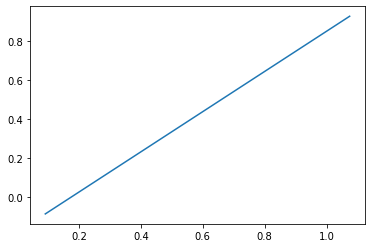

Train on 850 samples, validate on 150 samples
Epoch 1/50
850/850 [==============================] - 0s 317us/sample - loss: 0.1096 - val_loss: 0.7555
Epoch 2/50
850/850 [==============================] - 0s 17us/sample - loss: 0.0987 - val_loss: 0.7027
Epoch 3/50
850/850 [==============================] - 0s 18us/sample - loss: 0.0886 - val_loss: 0.6528
Epoch 4/50
850/850 [==============================] - 0s 20us/sample - loss: 0.0796 - val_loss: 0.6074
Epoch 5/50
850/850 [==============================] - 0s 18us/sample - loss: 0.0718 - val_loss: 0.5639
Epoch 6/50
850/850 [==============================] - 0s 18us/sample - loss: 0.0647 - val_loss: 0.5238
Epoch 7/50
850/850 [==============================] - 0s 21us/sample - loss: 0.0585 - val_loss: 0.4869
Epoch 8/50
850/850 [==============================] - 0s 20us/sample - loss: 0.0530 - val_loss: 0.4514
Epoch 9/50
850/850 [==============================] - 0s 18us/sample - loss: 0.0483 - val_loss: 0.4187
Epoch 10/50
850/850 [=====

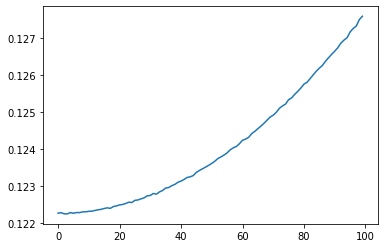

In [165]:
"""
PCA transformation of data
"""
from sklearn.preprocessing import StandardScaler

# y_val = np.reshape(data.y.values, (-1,1))

pca = PCA(n_components=1)
transformed_pca = pca.fit_transform(matrix)
recon = pca.inverse_transform(transformed_pca)
cost = np.mean(np.power(recon - data, 2), axis=1)
print('mse',np.mean(cost))
plt.plot(recon[:,0], recon[:,1])
plt.show()
# transformed_pca = pd.DataFrame(transformed_pca,
#                                columns=['x','y'])

"""
Autoencoder transformation of data
"""

model, encoder = build_model()
model.fit(matrix[:,1][:850], matrix[:,1][:850],
          epochs=50, batch_size=120,
          validation_data=(matrix[:,1][850:], 
                           matrix[:,1][850:]))
transformed_autoencoder = model.predict(data.y.values)
transformed_autoencoder = pd.DataFrame(transformed_autoencoder,
                                       columns=['y'])
_ = plt.plot(transformed_autoencoder.y[:100])

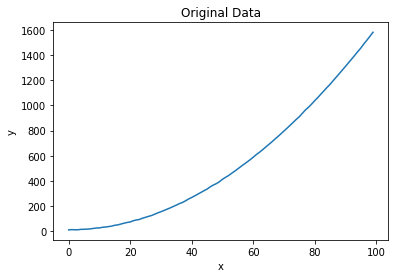

In [126]:
"""
Visualizations
"""
import matplotlib.pyplot as plt

# plt.figure(figsize=(6,5))

_ = plt.plot(data.y.values[:100])
_ = plt.title('Original Data')
_ = plt.xlabel('x')
_ = plt.ylabel('y')
plt.savefig('plots/x2.png')

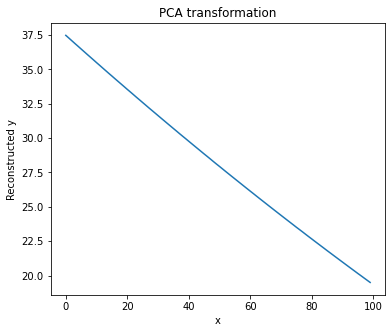

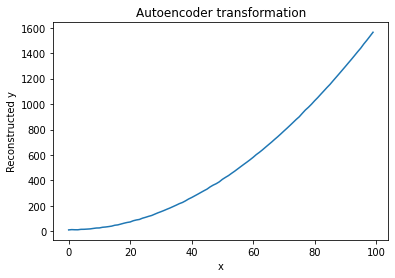

In [127]:
plt.figure(figsize=(6,5))

_ = plt.plot(transformed_pca.y[:100])
_ = plt.xlabel('x')
_ = plt.ylabel('Reconstructed y')
_ = plt.title('PCA transformation')
plt.savefig('plots/pca_x2.png')
plt.show()

_ = plt.plot(transformed_autoencoder.y[:100])#, transformed_autoencoder.T[1])
_ = plt.xlabel('x')
_ = plt.ylabel('Reconstructed y')
plt.title('Autoencoder transformation')
plt.savefig('plots/autoencoder_x2.png')
plt.show()

# y = mx^8 + c

In [128]:
"""
y = 4x^8 + 10.7
"""

x = np.linspace(0, 500, 1000)
m = 4
c = 10.7
y = (m*(x**5)) + c

In [129]:
"""
Adding noise to data
"""
noise = np.random.normal(0,1, y.shape)
y = y + noise
data = pd.DataFrame(columns=['x','y'])
data.x = x
data.y = y

In [130]:
from tensorflow.keras.optimizers import Adam, Adamax, Adadelta, SGD

def build_model():
    
    input_dim = 1
    
    input_layer = Input(shape=(input_dim,))
#     hidden_1 = Dense(2, activation='sigmoid')(input_layer)
    encoded = Dense(1, activation='sigmoid')(input_layer)
#     hidden_2 = Dense(2, activation='sigmoid')(encoded)
    output_layer = Dense(1, activation='sigmoid')(encoded)

    autoencoder = Model(input_layer, output_layer)
    op = SGD(clipvalue=0.1)
    autoencoder.compile(optimizer='adam',
                        loss='mse')
    encoder = Model(input_layer, encoded)
    return autoencoder, encoder

In [142]:
"""
PCA transformation of data
"""
from sklearn.preprocessing import StandardScaler

scaled_y = pd.DataFrame(StandardScaler().fit_transform(data), 
                        columns=['x','y'])
y_val = np.reshape(scaled_y.y.values, (-1,1))
pca = PCA(n_components=1)
transformed_pca = pca.fit_transform(y_val)
transformed_pca = pd.DataFrame(transformed_pca,
                               columns=['y'])

"""
Autoencoder transformation of data
"""
scaled = StandardScaler().fit_transform(np.reshape(data.y.values, (-1,1)))
model, encoder = build_model()
model.fit(data.y.values[:850], data.y.values[:850],
          epochs=50, batch_size=128,
          validation_data=(data.y.values[850:], 
                           data.y.values[850:]))
transformed_autoencoder = model.predict(data.y.values)
transformed_autoencoder = pd.DataFrame(transformed_autoencoder,
                                       columns=['y'])

Train on 850 samples, validate on 150 samples
Epoch 1/50
850/850 [==============================] - 0s 337us/sample - loss: 280638975713737753554321408.0000 - val_loss: 7922110257637246286711226368.0000
Epoch 2/50
850/850 [==============================] - 0s 20us/sample - loss: 280638982094140988656189440.0000 - val_loss: 7922110257637246286711226368.0000
Epoch 3/50
850/850 [==============================] - 0s 17us/sample - loss: 280638975670333638694666240.0000 - val_loss: 7922110257637246286711226368.0000
Epoch 4/50
850/850 [==============================] - 0s 22us/sample - loss: 280638987780078592162004992.0000 - val_loss: 7922110257637246286711226368.0000
Epoch 5/50
850/850 [==============================] - 0s 19us/sample - loss: 280638977406497786404274176.0000 - val_loss: 7922110257637246286711226368.0000
Epoch 6/50
850/850 [==============================] - 0s 23us/sample - loss: 280638974975867972738875392.0000 - val_loss: 7922110257637246286711226368.0000
Epoch 7/50
850/85

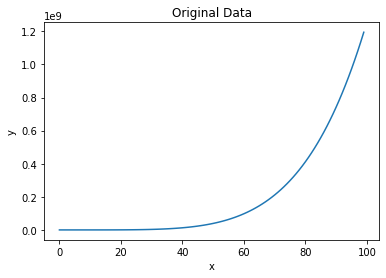

In [143]:
"""
Visualizations
"""
import matplotlib.pyplot as plt

# plt.figure(figsize=(6,5))

_ = plt.plot(data.y.values[:100])
_ = plt.title('Original Data')
_ = plt.xlabel('x')
_ = plt.ylabel('y')
# plt.savefig('plots/x5.png')

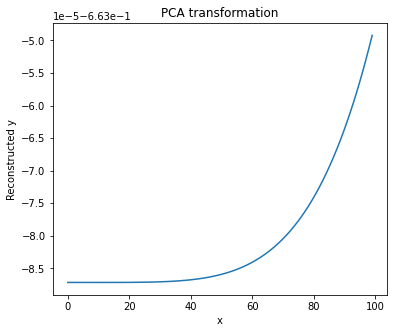

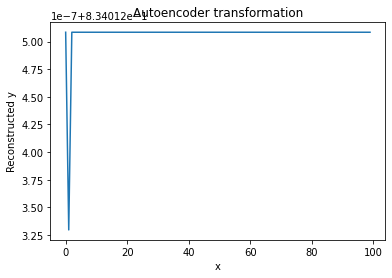

In [144]:
plt.figure(figsize=(6,5))

_ = plt.plot(transformed_pca.y[:100])
_ = plt.xlabel('x')
_ = plt.ylabel('Reconstructed y')
_ = plt.title('PCA transformation')
plt.savefig('plots/pca_x5.png')
plt.show()

_ = plt.plot(transformed_autoencoder.y[:100])#, transformed_autoencoder.T[1])
_ = plt.xlabel('x')
_ = plt.ylabel('Reconstructed y')
plt.title('Autoencoder transformation')
plt.savefig('plots/autoencoder_x5.png')
plt.show()

In [93]:
data

,x,y
0,0.000000,1.138883e+01
1,0.500501,1.091577e+01
2,1.001001,1.457101e+01
3,1.501502,1.128295e+02
4,2.002002,1.042920e+03
...,...,...
995,497.997998,1.513146e+22
996,498.498498,1.525355e+22
997,498.998999,1.537650e+22
998,499.499499,1.550031e+22
